In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mpcol

In [2]:
def process_image(path, inside = False):
    img = mpimg.imread(path)
    plt.figure()
    plt.imshow(img)
    brightness_threshold = 30
    moon_detect = mpcol.rgb_to_hsv(img)[...,2] > brightness_threshold
    x,y = np.where(moon_detect) if not inside else np.where(~moon_detect)
    dist_px = np.sqrt((x-moon_detect.shape[0]/2)**2 + (y-moon_detect.shape[1]/2)**2)
    min_dist_px = np.min(dist_px)
    plt.figure()
    plt.imshow(moon_detect, cmap = 'gray')
    plt.plot([moon_detect.shape[1]/2, y[np.argmin(dist_px)]], [moon_detect.shape[0]/2, x[np.argmin(dist_px)]], 'o-', color = 'red')
    # Data taken from [astrometry.net processed image](http://nova.astrometry.net/user_images/2878505#original)
    resolution_arcsec_px = 214/2
    resolution_deg_px = resolution_arcsec_px/3600
    moon_separation = min_dist_px * resolution_deg_px
    if inside:
        moon_separation = -moon_separation
    print('Moon seperation:', moon_separation, 'deg')

Moon seperation: 6.469961843009586 deg


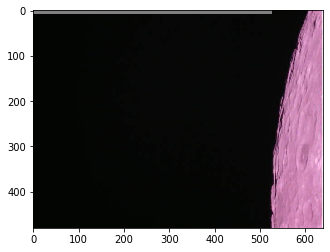

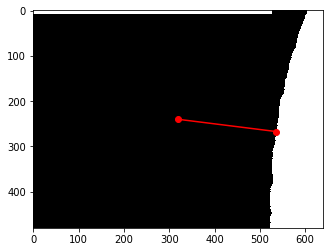

In [3]:
# 0xDA
process_image('c441fcda-3d75-4e70-9b8b-d46ee90b538c.jpeg')

Moon seperation: -1.3292181866248751 deg


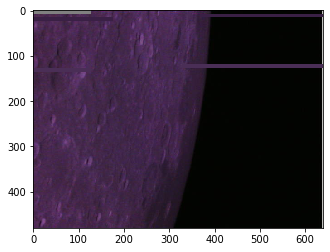

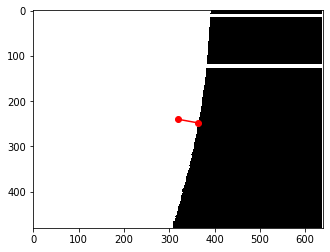

In [4]:
# 0xDD
process_image('e57a066f-1a81-441f-aee3-3659a3d2febd.jpeg', inside = True)

Moon seperation: 1.3121612143594001 deg


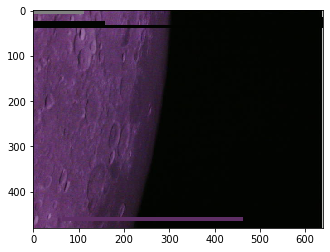

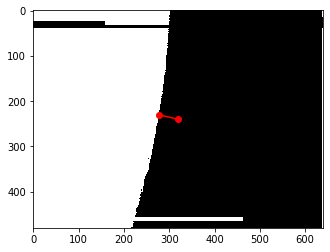

In [5]:
# 0xDE
process_image('da061413-8934-472b-aeb0-a2d435d404ba.jpeg')

Moon seperation: 4.700435772416988 deg


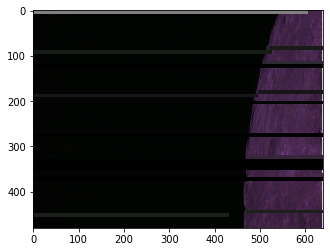

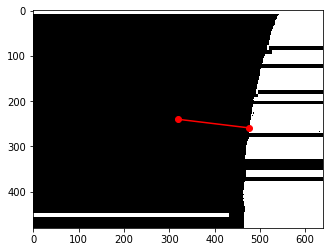

In [6]:
# 0xDB
process_image('4b097a47-f389-4286-86af-e122555d9d93_edited.jpeg')